In [1]:
import torch
import torch.nn as nn 
import torchvision
from torchvision.datasets import MNIST

Define the autoencoder model. 

In [14]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 28*28),
            nn.Tanh()
        )
        self.flatten = nn.Flatten() 
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
    def encode(self, x): 
        return self.encoder(x)

In [25]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, ), (0.5, ))
])

dataset = MNIST(
    root = r"~/Research/data/", 
    train = True,
    download = True, 
    transform=transform
)

dataloader = torch.utils.data.DataLoader(
    dataset = dataset, 
    batch_size = 64, 
    shuffle = True, 
    num_workers = 4
)

In [26]:
model = Autoencoder(latent_dim=2).cuda()
optimizer = torch.optim.Adam(
    params = model.parameters(),
)   # should use adam instead of sgd
loss = torch.nn.MSELoss() 

In [28]:
epochs = 20
for epoch in range(epochs): 
    for x, _ in dataloader:  
        y = nn.Flatten()(x.clone().cuda())
        x = x.cuda()
        
        x_flat = nn.Flatten()(x)
        optimizer.zero_grad() 
        
        pred = model(x_flat)
        
        loss_val = loss(pred,y) 
        loss_val.backward() 
        optimizer.step() 
    print(f"Epoch {epoch}, Loss {loss_val.item()}")

Epoch 0, Loss 0.18010851740837097
Epoch 1, Loss 0.19141682982444763
Epoch 2, Loss 0.1830654740333557
Epoch 3, Loss 0.14510777592658997
Epoch 4, Loss 0.1685333549976349
Epoch 5, Loss 0.15401065349578857
Epoch 6, Loss 0.15458856523036957
Epoch 7, Loss 0.15291549265384674
Epoch 8, Loss 0.16050776839256287
Epoch 9, Loss 0.1418914794921875
Epoch 10, Loss 0.16784241795539856
Epoch 11, Loss 0.15561088919639587
Epoch 12, Loss 0.14749586582183838
Epoch 13, Loss 0.15749524533748627
Epoch 14, Loss 0.15801562368869781
Epoch 15, Loss 0.16943281888961792
Epoch 16, Loss 0.13819319009780884
Epoch 17, Loss 0.15926209092140198
Epoch 18, Loss 0.15400250256061554
Epoch 19, Loss 0.15646837651729584


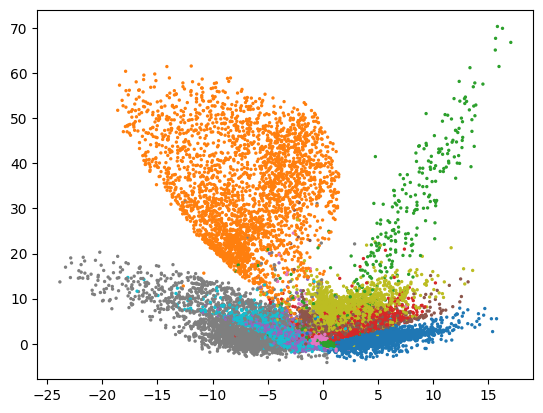

In [29]:
import matplotlib.pyplot as plt

for i, (x, y) in enumerate(dataloader): 
    z = model.encode(nn.Flatten()(x).cuda())
    z = z.cpu().detach().numpy() 
    plt.scatter(z[:, 0], z[:, 1], c=y, cmap="tab10", s=2)  
    if i > 400: 
        break 
plt.show()